In [1]:
import tree

def p_liscia(g: int):
    if g == 0:
        return 0.0
    else:
        return 0.25

In [2]:
res = tree.init_tree(4, 2, [(1, 5), (1, 5)], 2, p_liscia)
res2 = tree.init_tree(4, 2, [(1, 5), (1, 5)], 2, p_liscia)

In [3]:
tree.print_tree(res)
print("\n\n")
tree.print_tree(res2)

                                   (1|4.33)                                    
               (1|4.39)                                (1|3.98)                
     (1|2.40)            (1|4.88)            (1|4.72)            (1|2.88)      
   [0]       [1]    (0|1.19)  (1|2.94)  (1|2.65)     [1]    (1|3.20)  (1|2.03) 
                    [0]  [1]  [1]  [0]  [1]  [0]            [1]  [0]  [0]  [1] 



                                   (0|3.65)                                    
               (1|3.15)                                (0|4.21)                
        [0]                 [1]              (1|2.46)               [0]        
                                        (1|2.10)  (1|3.76)                     
                                        [0]  [1]  [1]  [0]                     


In [4]:
from reproduction import *
from matplotlib import pyplot as plt
from tree import *

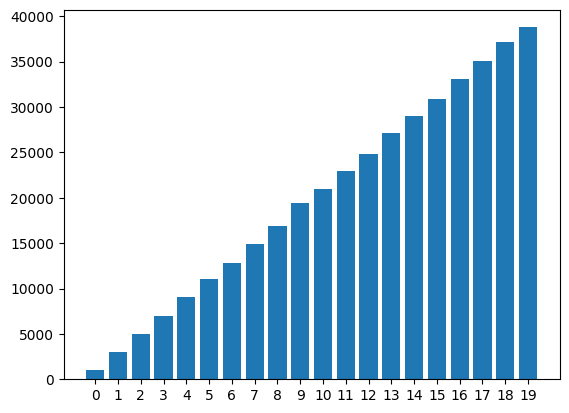

In [5]:
trees = [DecisionTree(LeafNode(0)) for _ in range(20)]
fitnesses = [float(x ** 2) for x in range(20)]
selected: list[DecisionTree] = []
for _ in range(20000):
    # selected += proportional_reproduction(trees, fitnesses)
    # selected += rank_reproduction(trees, fitnesses, 1/4, 1/4)
    # selected += truncation_reproduction(trees, fitnesses, 2/3)
    selected += tournament_reproduction(trees, fitnesses, 2)
counts = [0] * 20
for tree in selected:
    counts[trees.index(tree)] += 1
plt.bar(list(range(20)), counts)
plt.xticks(list(range(20)), [str(i) for i in range(20)])
plt.show()

In [6]:
from evo_tree import *
from succesion import *
from sklearn.model_selection import train_test_split
import pandas as pd


                                                                                                                                                                                                                                                                                                                                                                                                                                                         (15|286.66  )                                                                                                                                                                                                                                                                                                                                                                                                                                                         
                                                                                                        

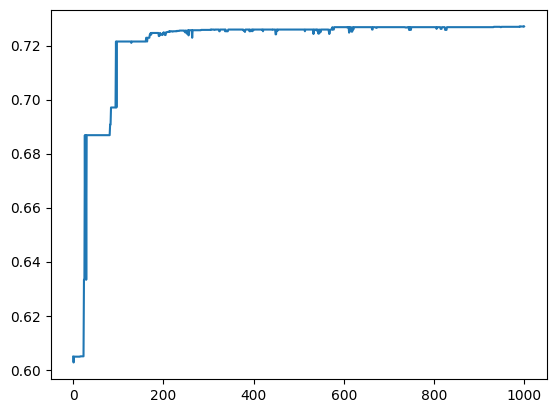

In [7]:
tree = EvoTree(
    20, 10, lambda x: 1 - (1 / (x + 1)), 1000,
    proportional_reproduction, 0.3, 0.5, 0,
    lambda pop, gen_op_pop, scores, gen_op_scores: elite_succession(pop, gen_op_pop, scores, gen_op_scores, 1)
    )

lol = pd.read_csv('../high_diamond_ranked_10min.csv')

target = lol['blueWins']

data = lol.drop(columns=['gameId', 'blueWins'])

X, X_ts, y, y_ts = train_test_split(data, target, test_size=0.2, random_state=42)
X_ts, X_val, y_ts, y_val = train_test_split(X_ts, y_ts, test_size=0.5, random_state=42)

history = tree.fit(X, y)

tree.print_tree()

plt.plot(list(range(len(history))), history)